<a href="https://colab.research.google.com/github/sarahsid10/LDA/blob/main/FinalProjectCode_ResearchTopics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyldavis
!pip install -U gensim
!pip install bertopic

     |████████████████████████████████| 1.7 MB 19.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 45.8 MB/s 
     |████████████████████████████████| 11.3 MB 36.2 MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=0a174eac267819a65072abb1119a5e732c7556b9064ac8c4cea095e07e22bcc0
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take i

     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 57 kB 4.6 MB/s 
     |████████████████████████████████| 86 kB 6.2 MB/s 
     |████████████████████████████████| 78 kB 8.0 MB/s 
     |████████████████████████████████| 13.2 MB 37.2 MB/s 
     |████████████████████████████████| 6.4 MB 42.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.3 MB 24.9 MB/s 
     |████████████████████████████████| 3.3 MB 38.0 MB/s 
     |████████████████████████████████| 1.2 MB 39.6 MB/s 
     |████████████████████████████████| 61 kB 530 kB/s 
     |████████████████████████████████| 895 kB 47.4 MB/s 
     |████████████████████████████████| 636 kB 65.2 MB/s 
     |███████████████████████████

In [ ]:
import gensim
import gensim.corpora as corpora
import io
import matplotlib.colors as mcolors
import nltk
import numpy as np
import operator
import pandas as pd
import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import seaborn as sns
import spacy

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python

In [ ]:
from bertopic import BERTopic
from gensim.models import TfidfModel
from gensim.models import CoherenceModel
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.utils import simple_preprocess
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

ValueError: ignored

In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')

In [ ]:
#load a previous built model
import pickle
model = pickle.load(open("lda.model2020", 'rb'))
corpus = pickle.load(open("corpus2020.file", 'rb'))
id2word = pickle.load(open("id2word2020.file", 'rb'))

#### Functions for all

In [ ]:
#"""https://spacy.io/api/annotation"""
#Function all words in our vocabulary to their root form
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
#Function to build bigrams
def buildBigrams(bigram_phraser, words):
    return [bigram_phraser[word] for word in words]

In [ ]:
#Function to build trigrams
def buildTrigrams(trigram_phraser, bigram_phraser, words):
  return [trigram_phraser[bigram_phraser[word]] for word in words]

In [ ]:
#Function to build an LDA model given a corpus, id2word dictionary, number of topics, alpha, and eta
def buildModel(corpus, id2word, topics, alpha, eta):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=15,
                                           alpha=alpha,
                                           eta=eta)
    return lda_model

In [ ]:
#Build a list of stop word
def getStopWords():
  stop_words = stopwords.words('english')
  stop_words.extend(['study', 'project', 'provided', 'utilized', 'also', 'whether',
                    'much', 'based', 'used', 'using', 'many', 'abstract', 'program',
                    'university', 'rochester', 'research', 'develop', 'evaluate',
                   'caused', 'allows', 'requires', 'includes', 'recent'])
  return stop_words

In [ ]:
#Function to remove all punctuation in the abstract data
def removePunctuation(abstracts):
  words = []
  for a in abstracts:
      #Remove punctuation
      temp = gensim.utils.simple_preprocess(str(a), deacc = True)
      words.append(temp)
  return words

In [ ]:
#Function to filter out words we dont not want in our final model
def filterWords(words, stop_words):
  data = []
  for wordList in words:
      temp = []
      for word in wordList:
        #removing words in stop words and words that are less than 3 characters
          if word not in stop_words and len(word) >= 3:
              temp.append(word)
      data.append(temp)
  return data

In [ ]:
#Function to get the bigrams
def getBigrams(data):
  #higher threshold results in fewer n-gram phrases
  bigram = Phrases(data, min_count=5, threshold=2, delimiter= ' ')
  bigram_phraser = Phraser(bigram)
  bigrams = buildBigrams(bigram_phraser, data)
  return bigram, bigram_phraser, bigrams

In [ ]:
#Function to get the trigrams
def getTrigrams(bigram, bigram_phraser, data):
  trigram = Phrases(bigram[data], threshold = 5) 
  trigram_phraser = Phraser(trigram)
  trigrams = buildTrigrams(trigram_phraser, bigram_phraser, data)
  return trigrams

In [ ]:
#Building our corpus based on id2word dictionary
def buildCorpus(data):
  corpus = []
  for text in data:
    #convert each text to a "bag-of-words"
    new = id2word.doc2bow(text)
    corpus.append(new)
  return corpus

In [ ]:
#TF-IDF removal : removes words that are too frequent
def termFrequencyInverse(corpus, id2word):
  tfidf = TfidfModel(corpus, id2word = id2word)
  low_value = 0.03
  words = []
  words_missing_in_tfidf = []
  for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = []
    tfidf_ids = [id for id, value in tfidf[bow]] 
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value<low_value]
    drops = low_value_words + words_missing_in_tfidf
    for item in drops:
      words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids]
    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow
  return corpus

In [ ]:
# Dominant topic and it's percentage in each document
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

# UR data 2000-2020

In [ ]:
df = pd.read_csv('Dimensions.csv', header = 1)

In [ ]:
df = df.dropna(subset=['Abstract'])

In [ ]:
#Convert Abstract column to list
abstracts = df["Abstract"].values.tolist()

In [ ]:
#Get year data for Topics Over Time chart
year = df['Start Year']

In [ ]:
#Next few steps for Preprocessing the data
words = removePunctuation(abstracts)

In [ ]:
stop_words = getStopWords()

In [ ]:
data = filterWords(words, stop_words)

In [ ]:
bigram, bigram_phraser, bigrams = getBigrams(data)

In [ ]:
trigrams = getTrigrams(bigram, bigram_phraser, data)

In [ ]:
#keep on words that are nouns, adjectives, verbs, or adverbs
data = lemmatization(trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
#Create dictionary mapping each unique word to an id
id2word = corpora.Dictionary(data)

In [ ]:
#Create unique id for each word
corpus = buildCorpus(data)

In [ ]:
#Cleaning our corpus with terms that are too frequent between documents
corpus = termFrequencyInverse(corpus, id2word)

In [ ]:
#Determine best number of topics
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for i in k:
  model = buildModel(corpus, id2word, i, 'auto', 'auto')
  coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  scores.append(coherence_lda)


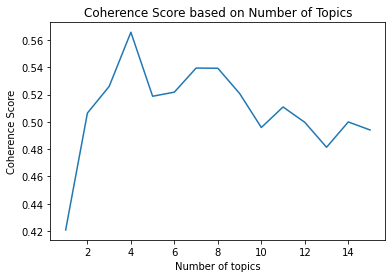

In [ ]:
#Plot for best number of topics
plt.plot(k, scores)
plt.title("Coherence Score based on Number of Topics")
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")
plt.show()

In [ ]:
#Best model
model = buildModel(corpus, id2word, 4, 'auto', 'auto')
coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
coherence_lda

0.5657304404180366

In [ ]:
### Looking at dominant keywords under each topic to assign labels in report
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.9058,"cell, gene, protein, function, receptor, speci...","[cytoplasmic, fat, storage, organelle, fundame..."
1,1,1.0,0.9150,"system, structure, model, method, technique, s...","[circle, optic, develop, low, parallax, image,..."
2,2,2.0,0.6083,"cell, gene, protein, function, receptor, speci...","[propose, mentor, patient_oriented, career, de..."
3,3,2.0,0.5466,"cell, gene, protein, function, receptor, speci...","[summary, animal, undergo, carefully, time, tr..."
4,4,2.0,0.9925,"cell, gene, protein, function, receptor, speci...","[virus, type, hpiv, major, cause, croup, young..."
5,5,2.0,0.6419,"cell, gene, protein, function, receptor, speci...","[detection, nonunion, nonsurgical, healing, ro..."
6,6,0.0,0.5334,"clinical, training, patient, health, child, tr...","[series, year, provide, affordable, open, acce..."
7,7,1.0,0.9722,"system, structure, model, method, technique, s...","[graphical, model, widely, tool, succinctly, r..."
8,8,0.0,0.8363,"clinical, training, patient, health, child, tr...","[aim, serve, national, interest, improve, qual..."
9,9,0.0,0.9934,"clinical, training, patient, health, child, tr...","[aim, serve, national, nee, improve, retention..."


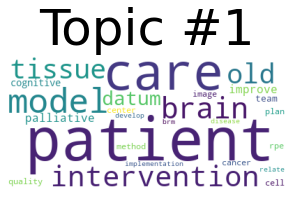

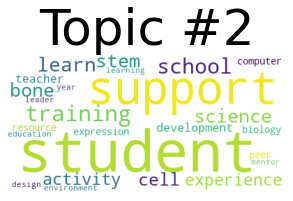

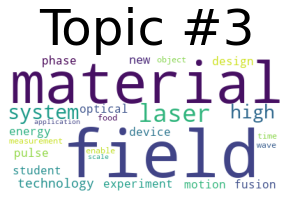

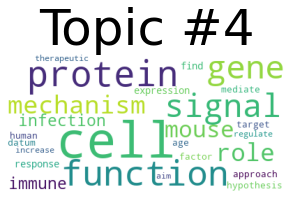

In [ ]:
for t in range(model.num_topics):
    plt.figure(figsize = (5,5))
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1).fit_words(dict(model.show_topic(t, 25))))
    plt.axis("off")
    plt.title("Topic #" + str(t+1), fontsize=50)
    plt.show()

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(model, corpus, id2word) #alpha =0.31 #eta = 0.91
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.014218  0.256310       1        1  37.897847
0     -0.196273 -0.062506       2        1  27.940711
1     -0.071062 -0.102235       3        1  25.246628
3      0.253117 -0.091568       4        1   8.914814, topic_info=         Term         Freq        Total Category  logprob  loglift
17       cell  4616.000000  4616.000000  Default  30.0000  30.0000
246      gene  1954.000000  1954.000000  Default  29.0000  29.0000
88    protein  1894.000000  1894.000000  Default  28.0000  28.0000
219  clinical  1559.000000  1559.000000  Default  27.0000  27.0000
713  training  1473.000000  1473.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
352     human   209.780552   791.187540   Topic4  -5.3639   1.0900
333    change   193.705888   855.949857   Topic4  -5.4437   0.9316
565  behavior   161.699924   576.981098   Topic4  -5.6243   1.1454
122  activity   166.109877   880.427058   Topic4  -5.5973   0.7497
946      area   163.316559   730.677695   Topic4  -5.6143   0.9192

[261 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
11364      4  0.992584  aberration
1802       2  0.935889    academic
1802       3  0.064836    academic
2309       4  0.994795    acoustic
1612       1  0.997839    activate
...      ...       ...         ...
401        2  0.191813        work
401        3  0.696447        work
401        4  0.070803        work
562        2  0.870406        year
562        3  0.128478        year

[385 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

Topic names: 1. Cell Biology 2. Physical/Natural Sciences 3. Clinical research 4. Brain and Cognitive Sciences

In [ ]:
#Building BERTopic model allowing up to trigrams
vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words = getStopWords())
topic_model = BERTopic(verbose=True, vectorizer_model = vectorizer_model, embedding_model=("paraphrase-MiniLM-L12-v2"), min_topic_size=20)
topics, _ = topic_model.fit_transform(abstracts)

In [ ]:
#Getting the top 4 topics from our BERTopic model
top = topic_model.get_topic_info()
top[1:5]

,Topic,Count,Name
1,0,775,0_patients_training_children_treatment
2,1,205,1_visual_neural_sensory_perception
3,2,176,2_rna_genes_genetic_dna
4,3,165,3_quantum_laser_optical_light


In [ ]:
#Total topics found by BERT
len(topic_model.get_topic_info())

In [ ]:
#Word cloud for BERT
for t in range(4):
    plt.figure(figsize = (5,5))
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1).fit_words(dict(topic_model.get_topic(t))))
    plt.axis("off")
    plt.title("Topic #" + str(t+1), fontsize=30)
    plt.show()

In [ ]:
#Build topics over time for visualization
topics_over_time = topic_model.topics_over_time(abstracts, topics, year)

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=4)

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time)

In [ ]:
#Display similarity matrix to see which topics are similar 
topic_model.visualize_heatmap(n_clusters=5)

/usr/local/lib/python3.7/dist-packages/plotly/express/_imshow.py:349: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
#Dump our models to a file for loading later
pickle.dump(model,open("lda.model",'wb'))
pickle.dump(corpus,open("corpus.file",'wb'))
pickle.dump(id2word,open("id2word.file",'wb'))

In [ ]:
pickle.dump(topic_model,open("BERT.model",'wb'))

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'URLDA.html')

# 2020 UR data

In [ ]:
df = pd.read_csv('Dimensions.csv', header = 1)

In [ ]:
df = df[df['Start Year'] == 2020]
df = df.dropna(subset=["Abstract"])
abstracts = df["Abstract"].values.tolist()

In [ ]:
stop_words = getStopWords()

In [ ]:
words = removePunctuation(abstracts)

In [ ]:
data = filterWords(words, stop_words)

In [ ]:
bigram, bigram_phraser, bigrams = getBigrams(data)

In [ ]:
trigrams = getTrigrams(bigram, bigram_phraser, data)

In [ ]:
data = lemmatization(trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
id2word = corpora.Dictionary(data)

In [ ]:
corpus = buildCorpus(data)

In [ ]:
corpus = termFrequencyInverse(corpus, id2word)

In [ ]:
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for i in k:
  model = buildModel(corpus, id2word, i, 'auto', 'auto')
  coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  scores.append(coherence_lda)


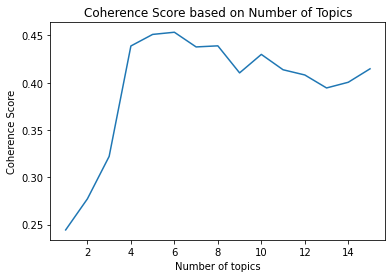

In [ ]:
#Plot for best number of topics
plt.plot(k, scores)
plt.title("Coherence Score based on Number of Topics")
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")
plt.show()

In [ ]:
model = buildModel(corpus, id2word, 4, 'auto', 'auto')
coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
coherence_lda

0.4388630067787369

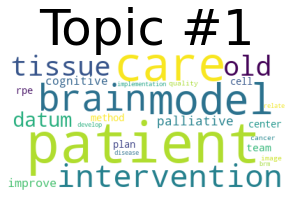

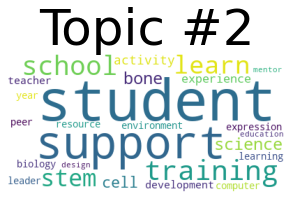

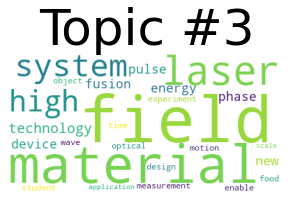

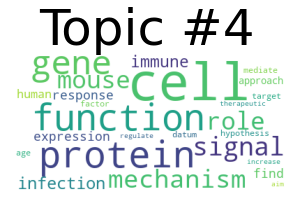

In [ ]:
for t in range(model.num_topics):
    plt.figure(figsize = (5,5))
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1).fit_words(dict(model.show_topic(t, 25))))
    plt.axis("off")
    plt.title("Topic #" + str(t+1), fontsize=50)
    plt.show()

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.177551  0.082733       1        1  29.860034
3     -0.162023  0.070576       2        1  28.503276
1      0.014405 -0.176900       3        1  21.176983
0     -0.029934  0.023591       4        1  20.459706, topic_info=           Term        Freq       Total Category  logprob  loglift
277     patient  100.000000  100.000000  Default  30.0000  30.0000
555     student   97.000000   97.000000  Default  29.0000  29.0000
17         cell  180.000000  180.000000  Default  28.0000  28.0000
1253       care   56.000000   56.000000  Default  27.0000  27.0000
88      protein   60.000000   60.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
797   community   15.654997   26.161890   Topic4  -5.8066   1.0732
30      disease   17.561727   41.865510   Topic4  -5.6916   0.7180
17         cell   20.359202  180.281250   Topic4  -5.5438  -0.5943
142     develop   16.195404   36.809118   Topic4  -5.7726   0.7657
202       adult   15.834626   34.128860   Topic4  -5.7952   0.8188

[259 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2297      1  0.962057  acoustic
122       1  0.155386  activity
122       2  0.332970  activity
122       3  0.510554  activity
782       3  0.074260     adapt
...     ...       ...       ...
1046      2  0.084782     world
561       2  0.335455      year
561       3  0.503182      year
561       4  0.167727      year
858       3  0.918222     youth

[410 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [ ]:
pickle.dump(model,open("lda.model2020",'wb'))
pickle.dump(corpus,open("corpus2020.file",'wb'))
pickle.dump(id2word,open("id2word2020.file",'wb'))

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'URLDA2020.html')

# 2015-2020 UR data

In [ ]:
df = pd.read_csv('Dimensions.csv', header = 1)

In [ ]:
df = df[df['Start Year']>=2015]
df = df.dropna(subset=["Abstract"])
abstracts = df["Abstract"].values.tolist()

In [ ]:
stop_words = getStopWords()

In [ ]:
words = removePunctuation(abstracts)

In [ ]:
data = filterWords(words, stop_words)

In [ ]:
bigram, bigram_phraser, bigrams = getBigrams(data)

In [ ]:
trigrams = getTrigrams(bigram, bigram_phraser, data)

In [ ]:
data = lemmatization(trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
id2word = corpora.Dictionary(data)

In [ ]:
corpus = buildCorpus(data)

In [ ]:
corpus = termFrequencyInverse(corpus, id2word)

In [ ]:
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for i in k:
  model = buildModel(corpus, id2word, i, 'auto', 'auto')
  coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  scores.append(coherence_lda)


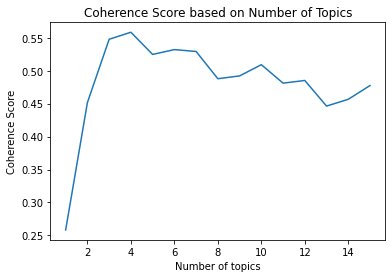

In [ ]:
plt.plot(k, scores)
plt.title("Coherence Score based on Number of Topics")
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")
plt.show()

In [ ]:
model = buildModel(corpus, id2word, 4, 'auto', 'auto')
coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
coherence_lda

0.5584203407593276

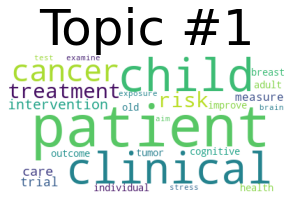

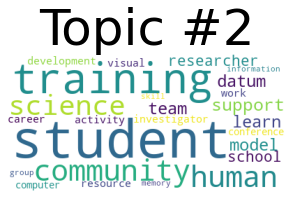

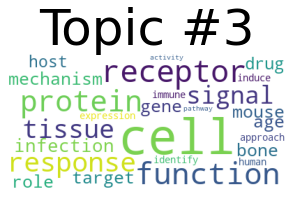

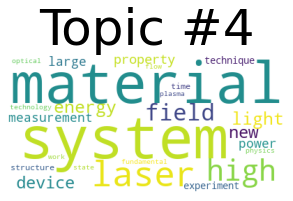

In [ ]:
for t in range(model.num_topics):
    plt.figure(figsize = (5,5))
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1).fit_words(dict(model.show_topic(t, 25))))
    plt.axis("off")
    plt.title("Topic #" + str(t+1), fontsize=50)
    plt.show()

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.143847 -0.197916       1        1  32.149594
3      0.181843 -0.038361       2        1  25.210851
1      0.134584  0.062776       3        1  24.479111
0     -0.172579  0.173501       4        1  18.160443, topic_info=        Term         Freq        Total Category  logprob  loglift
17      cell  1305.000000  1305.000000  Default  30.0000  30.0000
276  patient   562.000000   562.000000  Default  29.0000  29.0000
408    child   303.000000   303.000000  Default  28.0000  28.0000
555  student   451.000000   451.000000  Default  27.0000  27.0000
298     risk   232.000000   232.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
203      aim    90.188891   228.113985   Topic4  -5.6861   0.7780
561     year    85.443161   195.117633   Topic4  -5.7401   0.8802
179   reduce    80.614128   161.201037   Topic4  -5.7983   1.0129
329    brain    87.662620   317.166059   Topic4  -5.7145   0.4200
234   effect    83.271494   272.359950   Topic4  -5.7659   0.5209

[267 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1608      1  0.987404  activate
122       1  0.572248  activity
122       3  0.427420  activity
202       1  0.319252     adult
202       4  0.677597     adult
...     ...       ...       ...
401       2  0.456316      work
401       3  0.498854      work
561       2  0.153753      year
561       3  0.410009      year
561       4  0.435635      year

[395 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus, texts=data)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.7416,"cell, receptor, tissue, protein, function, res...","[cytoplasmic, fat, storage, organelle, fundame..."
1,1,4.0,0.6735,"material, system, high, laser, field, energy, ...","[circle, optic, develop, low, parallax, image,..."
2,2,2.0,0.5903,"cell, receptor, tissue, protein, function, res...","[propose, mentor, patient, orient, career, dev..."
3,3,3.0,0.6120,"brain, activity, change, age, specie, memory, ...","[summary, animal, undergo, carefully, time, tr..."
4,4,2.0,0.8274,"cell, receptor, tissue, protein, function, res...","[virus, type, hpiv, major, cause, croup, young..."
5,5,2.0,0.7065,"cell, receptor, tissue, protein, function, res...","[detection, nonunion, nonsurgical, healing, ro..."
6,6,1.0,0.9073,"student, training, community, science, support...","[series, year, provide, affordable, open, acce..."
7,7,1.0,0.6780,"student, training, community, science, support...","[graphical, model, widely, tool, succinctly, r..."
8,8,1.0,0.9018,"student, training, community, science, support...","[aim, serve, national, interest, improve, qual..."
9,9,1.0,0.9808,"student, training, community, science, support...","[aim, serve, national, nee, improve, retention..."


In [ ]:
pickle.dump(model,open("lda.model2015_20",'wb'))
pickle.dump(corpus,open("corpus2015_20.file",'wb'))
pickle.dump(id2word,open("id2word2015_20.file",'wb'))

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'URLDA2015_20.html')

# 2010 - 2014 UR Data

In [ ]:
df = pd.read_csv('Dimensions.csv', header = 1)

In [ ]:
df = df.loc[(df['Start Year']>=2010)&(df['Start Year']<2015)]
df = df.dropna(subset=["Abstract"])
abstracts = df["Abstract"].values.tolist()

In [ ]:
stop_words = getStopWords()

In [ ]:
words = removePunctuation(abstracts)

In [ ]:
data = filterWords(words, stop_words)

In [ ]:
bigram, bigram_phraser, bigrams = getBigrams(data)

In [ ]:
trigrams = getTrigrams(bigram, bigram_phraser, data)

In [ ]:
data = lemmatization(trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']) 

In [ ]:
id2word = corpora.Dictionary(data)

In [ ]:
corpus = buildCorpus(data)

In [ ]:
corpus = termFrequencyInverse(corpus, id2word)

In [ ]:
loaded_model = pickle.load(open("lda.model2010_14", 'rb'))
loaded_corpus = pickle.load(open("corpus.file", 'rb'))
loaded_id2word = pickle.load(open("id2word.file", 'rb'))

In [ ]:
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for i in k:
  model = buildModel(corpus, id2word, i, 'auto', 'auto')
  coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  scores.append(coherence_lda)

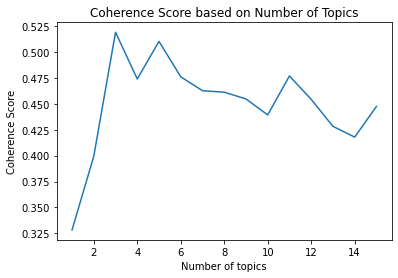

In [ ]:
plt.plot(k, scores)
plt.title("Coherence Score based on Number of Topics")
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")
plt.show()

In [ ]:
model = buildModel(corpus, id2word, 3, 'auto', 'auto')
coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
coherence_lda

0.5190668258641619

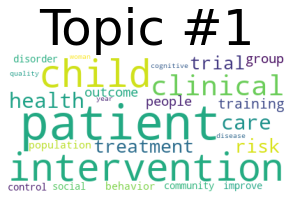

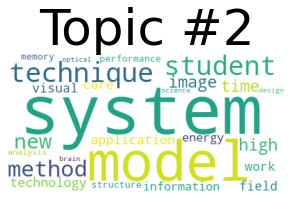

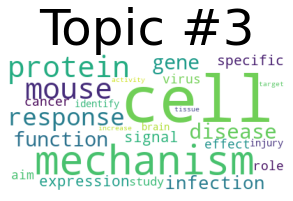

In [ ]:
for t in range(model.num_topics):
    plt.figure(figsize = (5,5))
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1).fit_words(dict(model.show_topic(t, 25))))
    plt.axis("off")
    plt.title("Topic #" + str(t+1), fontsize=50)
    plt.show()

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.201185  0.002379       1        1  38.710723
1      0.098173 -0.149585       2        1  31.084104
0      0.103012  0.147206       3        1  30.205173, topic_info=              Term        Freq       Total Category  logprob  loglift
5             cell  884.000000  884.000000  Default  30.0000  30.0000
258        patient  385.000000  385.000000  Default  29.0000  29.0000
706   intervention  230.000000  230.000000  Default  28.0000  28.0000
2537         child  225.000000  225.000000  Default  27.0000  27.0000
77          system  317.000000  317.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
827           year   92.701020  128.069669   Topic3  -5.8236   0.8740
1645     scientist   85.246981  112.869269   Topic3  -5.9074   0.9165
208        control   97.055019  161.717536   Topic3  -5.7777   0.6866
316        disease   89.194432  301.122570   Topic3  -5.8621  -0.0195
389       activity   84.938635  276.116286   Topic3  -5.9110   0.0183

[208 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
830       2  0.994076  acquisition
1034      1  0.992446     activate
90        1  0.973822   activation
90        2  0.009017   activation
90        3  0.018034   activation
...     ...       ...          ...
299       1  0.053620         work
299       2  0.542162         work
299       3  0.399174         work
827       2  0.273289         year
827       3  0.726167         year

[298 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [ ]:

df_topic_sents_keywords = format_topics_sentences(ldamodel=loaded_model, corpus=loaded_corpus, texts=loaded_id2word)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.5713,"high, new, system, student, time, application,...",allow
1,1,1.0,0.5888,"cell, response, mechanism, mouse, infection, p...",already
2,2,3.0,0.6223,"brain, activity, system, model, neuron, visual...",associate
3,3,4.0,0.6398,"high, new, system, student, time, application,...",become
4,4,0.0,0.3976,"child, intervention, training, care, focus, ad...",biology
5,5,0.0,0.3838,"child, intervention, training, care, focus, ad...",cell
6,6,4.0,0.6934,"high, new, system, student, time, application,...",comparison
7,7,2.0,0.6743,"patient, cancer, treatment, risk, health, popu...",context
8,8,1.0,0.6742,"cell, response, mechanism, mouse, infection, p...",couple
9,9,1.0,0.5241,"cell, response, mechanism, mouse, infection, p...",deep


In [ ]:
pickle.dump(model,open("lda.model2010_14",'wb'))
pickle.dump(corpus,open("corpus2010_14.file",'wb'))
pickle.dump(id2word,open("id2word2010_14.file",'wb'))

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'URLDA2010_14.html')

# 2005-2009 UR Data

In [ ]:
df = pd.read_csv('Dimensions.csv', header = 1)

In [ ]:
df = df.loc[(df['Start Year']>=2005)&(df['Start Year']<2010)]
df = df.dropna(subset=["Abstract"])
abstracts = df["Abstract"].values.tolist()

In [ ]:
stop_words = getStopWords()

In [ ]:
words = removePunctuation(abstracts)

In [ ]:
data = filterWords(words, stop_words)

In [ ]:
bigram, bigram_phraser, bigrams = getBigrams(data)

In [ ]:
trigrams = getTrigrams(bigram, bigram_phraser, data)

In [ ]:
data = lemmatization(trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
id2word = corpora.Dictionary(data)

In [ ]:
corpus = buildCorpus(data)

In [ ]:
corpus = termFrequencyInverse(corpus, id2word)

In [ ]:
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for i in k:
  model = buildModel(corpus, id2word, i, 'auto', 'auto')
  coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  scores.append(coherence_lda)


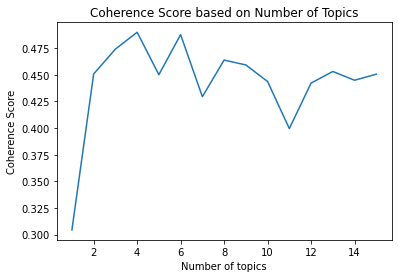

In [ ]:
plt.plot(k, scores)
plt.title("Coherence Score based on Number of Topics")
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")
plt.show()

In [ ]:
model = buildModel(corpus, id2word, 4, 'auto', 'auto') 
coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
coherence_lda

0.48995225952536564

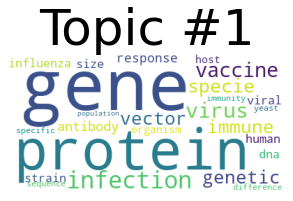

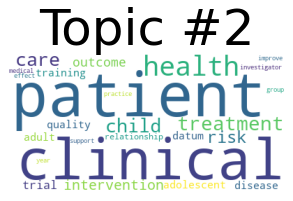

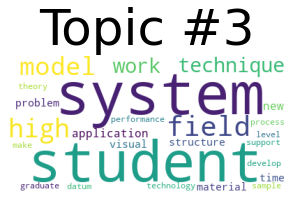

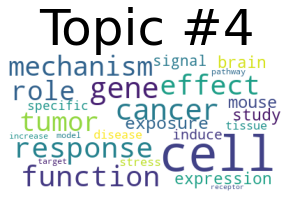

In [ ]:
for t in range(model.num_topics):
    plt.figure(figsize = (5,5))
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1).fit_words(dict(model.show_topic(t, 25))))
    plt.axis("off")
    plt.title("Topic #" + str(t+1), fontsize=50)
    plt.show()

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.152818  0.151178       1        1  34.784051
1      0.184293  0.097117       2        1  27.248831
2      0.122875 -0.119468       3        1  25.861183
0     -0.154350 -0.128827       4        1  12.105935, topic_info=           Term         Freq        Total Category  logprob  loglift
15         cell  1365.000000  1365.000000  Default  30.0000  30.0000
141        gene   471.000000   471.000000  Default  29.0000  29.0000
397     patient   435.000000   435.000000  Default  28.0000  28.0000
704    clinical   340.000000   340.000000  Default  27.0000  27.0000
818      health   319.000000   319.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
548    response    67.669114   349.319865   Topic4  -5.3287   0.4701
98     specific    55.011958   263.662290   Topic4  -5.5358   0.5444
400  population    45.135701   154.137646   Topic4  -5.7337   0.8833
31    determine    44.955682   205.935000   Topic4  -5.7377   0.5896
280     process    42.805943   194.107587   Topic4  -5.7867   0.5997

[258 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3096      1  0.031719       abuse
3096      2  0.967442       abuse
3205      4  0.972266        acid
896       1  0.989500    activate
897       1  0.994797  activation
...     ...       ...         ...
301       4  0.100142        work
578       2  0.603539        year
578       3  0.314343        year
578       4  0.081729        year
3413      4  0.983813       yeast

[375 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

In [ ]:
pickle.dump(model,open("lda.model2005_09",'wb'))
pickle.dump(corpus,open("corpus2005_09.file",'wb'))
pickle.dump(id2word,open("id2word2005_09.file",'wb'))

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'URLDA2005_09.html')

# 2000 - 2004 UR Data

In [ ]:
df = pd.read_csv('Dimensions.csv', header = 1)

In [ ]:
df = df.loc[(df['Start Year']>=2000)&(df['Start Year']<2005)]
df = df.dropna(subset=["Abstract"])
abstracts = df["Abstract"].values.tolist()

In [ ]:
stop_words = getStopWords()

In [ ]:
words = removePunctuation(abstracts)

In [ ]:
data = filterWords(words, stop_words)

In [ ]:
bigram, bigram_phraser, bigrams = getBigrams(data)

In [ ]:
trigrams = getTrigrams(bigram, bigram_phraser, data)

In [ ]:
data = lemmatization(trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
id2word = corpora.Dictionary(data)

In [ ]:
corpus = buildCorpus(data)

In [ ]:
corpus = termFrequencyInverse(corpus, id2word)

In [ ]:
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for i in k:
  model = buildModel(corpus, id2word, i, 'auto', 'auto')
  coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  scores.append(coherence_lda)


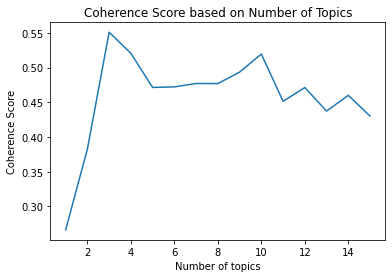

In [ ]:
plt.plot(k, scores)
plt.title("Coherence Score based on Number of Topics")
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")
plt.show()

In [ ]:
model = buildModel(corpus, id2word, 3, 'auto', 'auto') 
coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
coherence_lda

0.5510536729591279

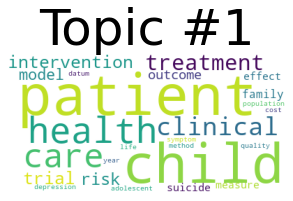

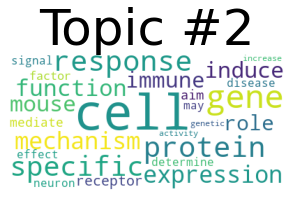

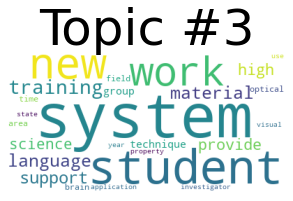

In [ ]:
for t in range(model.num_topics):
    plt.figure(figsize = (5,5))
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1).fit_words(dict(model.show_topic(t, 25))))
    plt.axis("off")
    plt.title("Topic #" + str(t+1), fontsize=50)
    plt.show()

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.191724  0.007585       1        1  40.606220
2      0.088540 -0.152746       2        1  33.680171
0      0.103184  0.145162       3        1  25.713609, topic_info=        Term        Freq       Total Category  logprob  loglift
13      cell  939.000000  939.000000  Default  30.0000  30.0000
310  patient  319.000000  319.000000  Default  29.0000  29.0000
410    child  262.000000  262.000000  Default  28.0000  28.0000
910     gene  325.000000  325.000000  Default  27.0000  27.0000
223   health  213.000000  213.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
648     year   73.822031  150.933106   Topic3  -5.7430   0.6430
94       age   66.454951  121.309098   Topic3  -5.8481   0.7563
114   effect   81.273552  243.347650   Topic3  -5.6468   0.2615
95       aim   66.272045  216.703365   Topic3  -5.8509   0.1734
87      test   63.176120  170.529812   Topic3  -5.8987   0.3652

[202 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1966      3  0.975491       abuse
1166      1  0.993615    activate
729       1  0.906436  activation
729       2  0.084978  activation
272       1  0.689720    activity
...     ...       ...         ...
595       3  0.013331        work
2643      2  0.984224    workshop
648       2  0.510160        year
648       3  0.490283        year
936       1  0.985112       yeast

[286 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [ ]:
pickle.dump(model,open("lda.model2000_04",'wb'))
pickle.dump(corpus,open("corpus2000_04.file",'wb'))
pickle.dump(id2word,open("id2word2000_04.file",'wb'))

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'URLDA2005_09.html')

# 2000 UR data


In [ ]:
df = pd.read_csv('Dimensions.csv', header = 1)

In [ ]:
df = df[df['Start Year'] == 2000]
df = df.dropna(subset=["Abstract"])
abstracts = df["Abstract"].values.tolist()

In [ ]:
stop_words = getStopWords()

In [ ]:
words = removePunctuation(abstracts)

In [ ]:
words = removePunctuation(abstracts)

In [ ]:
bigram, bigram_phraser, bigrams = getBigrams(data)

In [ ]:
trigrams = getTrigrams(bigram, bigram_phraser, data)

In [ ]:
data = lemmatization(trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']) 

In [ ]:
id2word = corpora.Dictionary(data)

In [ ]:
corpus = buildCorpus(data)

In [ ]:
corpus = termFrequencyInverse(corpus, id2word)

In [ ]:
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for i in k:
  model = buildModel(corpus, id2word, i, 'auto', 'auto')
  coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  scores.append(coherence_lda)

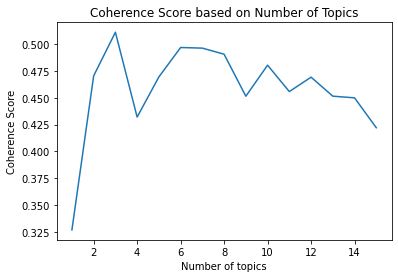

In [ ]:
plt.plot(k, scores)
plt.title("Coherence Score based on Number of Topics")
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")
plt.show()

In [ ]:
model = buildModel(corpus, id2word, 3, 'auto', 'auto')
coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
coherence_lda

0.5109286229431698

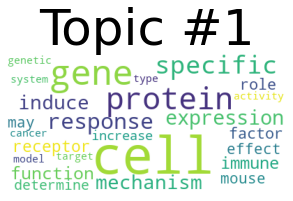

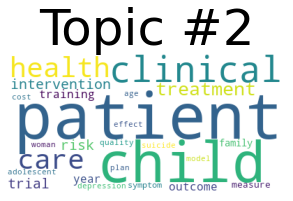

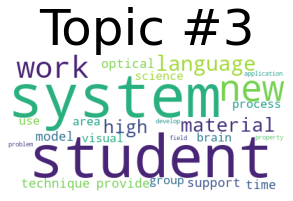

In [ ]:
for t in range(model.num_topics):
    plt.figure(figsize = (5,5))
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1).fit_words(dict(model.show_topic(t, 25))))
    plt.axis("off")
    plt.title("Topic #" + str(t+1), fontsize=50)
    plt.show()

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.184641  0.022703       1        1  40.631810
2      0.069087 -0.146671       2        1  32.731277
1      0.115554  0.123968       3        1  26.636912, topic_info=             Term        Freq       Total Category  logprob  loglift
12           cell  900.000000  900.000000  Default  30.0000  30.0000
373      clinical  220.000000  220.000000  Default  29.0000  29.0000
279       patient  285.000000  285.000000  Default  28.0000  28.0000
839          gene  320.000000  320.000000  Default  27.0000  27.0000
372         child  246.000000  246.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
63         reduce   61.363328  104.615738   Topic3  -5.8914   0.7894
610  investigator   63.118621  129.626316   Topic3  -5.8632   0.6032
427         model   70.067671  277.846188   Topic3  -5.7587  -0.0547
100        effect   68.143462  241.662021   Topic3  -5.7866   0.0569
405           use   64.494089  177.149639   Topic3  -5.8416   0.3125

[212 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1806      3  0.990877        abuse
2751      2  0.972259  acquisition
1077      1  0.994286     activate
248       1  0.672074     activity
248       2  0.193557     activity
...     ...       ...          ...
2437      2  0.960084     workshop
2437      3  0.032003     workshop
596       2  0.319728         year
596       3  0.677072         year
859       1  0.977476        yeast

[314 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [ ]:
pickle.dump(model,open("lda.model2000",'wb'))
pickle.dump(corpus,open("corpus2000.file",'wb'))
pickle.dump(id2word,open("id2word2000.file",'wb'))

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'URLDA2000.html')

# CS grants at R1 institutions


In [ ]:
model = pickle.load(open("r1lda.model", 'rb'))
loaded_corpus = pickle.load(open("r1corpus.file", 'rb'))
loaded_id2word = pickle.load(open("r1id2word.file", 'rb'))

In [ ]:
df = pd.read_csv('r1data.csv')
df = df.dropna(subset=['Abstract'])

In [ ]:
abstracts = df["Abstract"].values.tolist()

In [ ]:
year = df['Start Year']

In [ ]:
stop_words = getStopWords()

In [ ]:
words = removePunctuation(abstracts)

In [ ]:
data = filterWords(words, stop_words)

In [ ]:
bigram, bigram_phraser, bigrams = getBigrams(data)

In [ ]:
trigrams = getTrigrams(bigram, bigram_phraser, data)

In [ ]:
data = lemmatization(trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
id2word = corpora.Dictionary(data)

In [ ]:
corpus = buildCorpus(data)

In [ ]:
corpus = termFrequencyInverse(corpus, id2word)

In [ ]:
#Calculate best k in batches
k = [3,6,9,12,15] 
scores = []

for i in k:
  model = buildModel(corpus, id2word, i, 'auto', 'auto')
  coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  scores.append(coherence_lda)

In [ ]:
k = [18,21,24,27,30] 

for i in k:
  model = buildModel(corpus, id2word, i, 'auto', 'auto')
  coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  scores.append(coherence_lda)

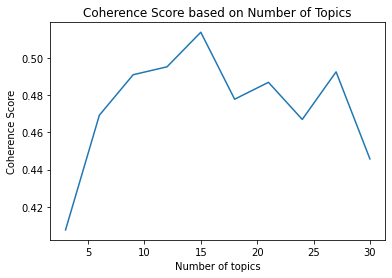

In [ ]:
k = [3,6,9,12,15,18,21,24,27,30] 
plt.plot(k, scores)
plt.title("Coherence Score based on Number of Topics")
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")
plt.show()

In [ ]:
#Best model for R1 data
model = buildModel(corpus, id2word, 15, 'auto', 'auto')
coherence_model_lda = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
coherence_lda

0.5139470963179047

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus, texts=data)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.3146,"software, performance, computing, applications...","[agility, prime, air, vehicle, distributed, pr..."
1,1,14.0,0.3097,"systems, system, time, models, model, simulati...","[proposal, addresses, tracking, forecasting, c..."
2,2,14.0,0.5741,"systems, system, time, models, model, simulati...","[natural, environments, robots, lack, autonomo..."
3,3,0.0,0.1939,"control, sensor, sensors, robot, robots, sensi...","[emerging, evtol, urban, air, mobility, techno..."
4,4,14.0,0.6120,"systems, system, time, models, model, simulati...","[interactions, rotor, wake, ship, deck, ship, ..."
5,5,0.0,0.2911,"control, sensor, sensors, robot, robots, sensi...","[propose, validate, technologies, wide, applic..."
6,6,11.0,0.2602,"learning, human, work, machine, user, knowledg...","[proposal, autonomous, search, rescue, asar, m..."
7,7,14.0,0.2222,"systems, system, time, models, model, simulati...","[cateni, identified, market, opportunity, deve..."
8,8,11.0,0.2363,"learning, human, work, machine, user, knowledg...","[problem, end, user, computing, devices, incre..."
9,9,13.0,0.3523,"students, graduate, workshop, education, impor...","[developing, effective, solutions, problems, c..."


In [ ]:
for t in range(model.num_topics):
    plt.figure(figsize = (5,5))
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1).fit_words(dict(model.show_topic(t, 25))))
    plt.axis("off")
    plt.title("Topic #" + str(t+1), fontsize=30)
    plt.show()

NameError: ignored

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.186956 -0.172021       1        1  14.888831
14     0.175005  0.099633       2        1  14.545059
11     0.193295  0.001877       3        1  14.537869
10     0.213874  0.069618       4        1  11.884022
1      0.202498  0.075252       5        1  11.161588
5     -0.004183 -0.107891       6        1   5.313455
13     0.019170 -0.324561       7        1   4.717331
3     -0.075115  0.162021       8        1   4.317405
2     -0.010680  0.146475       9        1   4.100495
7      0.015345  0.002478      10        1   3.749687
0     -0.156754 -0.027001      11        1   2.932684
8     -0.161313  0.007186      12        1   2.700226
12    -0.140167  0.188541      13        1   2.073413
6     -0.210396 -0.082061      14        1   1.967427
4     -0.247537 -0.039546      15        1   1.110508, topic_info=             Term          Freq         Total Category  logprob  loglift
107          data  96118.000000  96118.000000  Default  30.0000  30.0000
21         design  39131.000000  39131.000000  Default  29.0000  29.0000
936   information  33018.000000  33018.000000  Default  28.0000  28.0000
15        control  23392.000000  23392.000000  Default  27.0000  27.0000
1103     students  25206.000000  25206.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
2811        parts   1082.687979   2933.905000  Topic15  -4.3791   3.5035
2803   industries    775.095385   1822.766113  Topic15  -4.7133   3.6452
1173   production    834.372998   3822.082715  Topic15  -4.6397   2.9785
281    properties    859.628830   6871.245697  Topic15  -4.6098   2.4218
1484    processes    844.756864   7423.177150  Topic15  -4.6273   2.3270

[794 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
2202      3  0.998631     abilities
1426      5  0.999412  abstractions
749       1  0.522966        access
749       5  0.155081        access
749       6  0.008841        access
...     ...       ...           ...
326       3  0.613130         world
326       4  0.032313         world
326       7  0.067426         world
1117      1  0.999275        worthy
4034     14  0.994640         youth

[1331 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 15, 12, 11, 2, 6, 14, 4, 3, 8, 1, 9, 13, 7, 5])

In [ ]:
pickle.dump(model,open("r1lda.model",'wb'))
pickle.dump(corpus,open("r1corpus.file",'wb'))
pickle.dump(id2word,open("r1id2word.file",'wb'))
pyLDAvis.save_html(LDAvis_prepared,'r1model.html')

BERTOPIC with vectorizer, embedded and stop words

In [ ]:

vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words = stopwords.words('english'), min_df=15)


In [ ]:
topic_model = BERTopic(verbose=True, vectorizer_model =vectorizer_model, embedding_model=("paraphrase-MiniLM-L12-v2"), min_topic_size=200, calculate_probabilities = "FALSE")
topics, _ = topic_model.fit_transform(abstracts); len(topic_model.get_topic_info())  #we get 36 topics

In [ ]:
pickle.dump(topic_model,open("r1bert.model",'wb'))

In [ ]:
topics_over_time = topic_model.topics_over_time(abstracts, topics, year)

49it [05:21,  6.56s/it]


In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=15, width=900, height=500)

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=36, width=900, height=500)

In [ ]:
topic_model.visualize_heatmap(top_n_topics=36, n_clusters=5)

/usr/local/lib/python3.7/dist-packages/plotly/express/_imshow.py:349: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
topic_model.get_topic(4) #topics 4, 16, 26 and 32 have high similarities

[('conference', 0.04330858869619165),
 ('researchers', 0.022550960050392293),
 ('international', 0.01698079182788281),
 ('travel', 0.015314170826784868),
 ('participants', 0.013796714165739094),
 ('doctoral', 0.013291073074919923),
 ('symposium', 0.01280493084247362),
 ('participation', 0.010973208580044684),
 ('meeting', 0.01035374029194816),
 ('forum', 0.010067793631382183)]

In [ ]:
topic_model.get_topic(16)

[('learning', 0.03843754182520928),
 ('students', 0.030778933599900977),
 ('student', 0.01972489297385439),
 ('teachers', 0.011809145009895097),
 ('learners', 0.011399618294257176),
 ('teaching', 0.01070874754325279),
 ('educational', 0.01027152431110146),
 ('virtual', 0.010024400745286745),
 ('learn', 0.009595665796775095),
 ('computer science', 0.008680621866965122)]

In [ ]:
topic_model.get_topic(26)

[('university', 0.05281175237207395),
 ('industry university', 0.017565572769761166),
 ('cooperative research', 0.01627738217138731),
 ('research center', 0.016217910371866137),
 ('students', 0.012475844291099897),
 ('technology', 0.011258754614987175),
 ('state university', 0.010275998213938278),
 ('faculty', 0.010195926649270793),
 ('projects', 0.009193709751979608),
 ('technologies', 0.008852377104424559)]

In [ ]:
topic_model.get_topic(32)

[('reu', 0.06461926190359053),
 ('students', 0.05201157471284973),
 ('undergraduates', 0.02458114685741668),
 ('undergraduate', 0.018128731709550573),
 ('research experiences', 0.01672597151556206),
 ('undergraduate students', 0.014237994462413493),
 ('research projects', 0.014025997175111628),
 ('research experiences undergraduates', 0.012835497104075989),
 ('experiences undergraduates', 0.012759135379062089),
 ('student', 0.010406222018500328)]

In [ ]:
top = topic_model.get_topic_info()
top

,Topic,Count,Name
0,-1,23465,-1_research_systems_system_based
1,0,3664,0_imaging_brain_images_visual
2,1,2114,1_algorithms_optimization_algebraic_methods
3,2,1597,2_wireless_network_networks_coding
4,3,1592,3_robot_robots_robotic_robotics
5,4,1528,4_conference_researchers_international_travel
6,5,1450,5_sensor_sensors_uav_underwater
7,6,1349,6_biology_dna_genome_gene
8,7,1311,7_parallel_hardware_processors_computing
9,8,1034,8_traffic_transportation_vehicle_vehicles


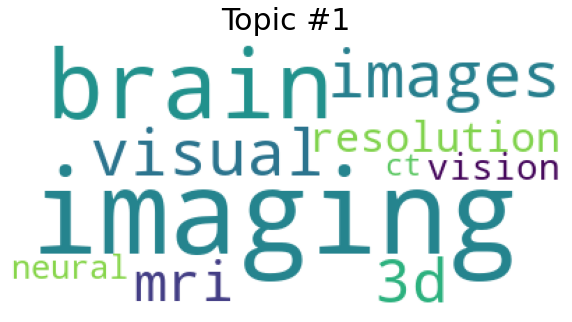

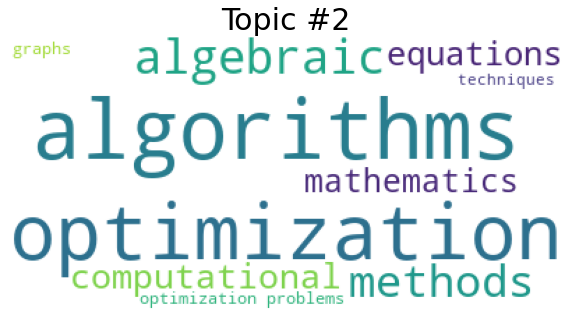

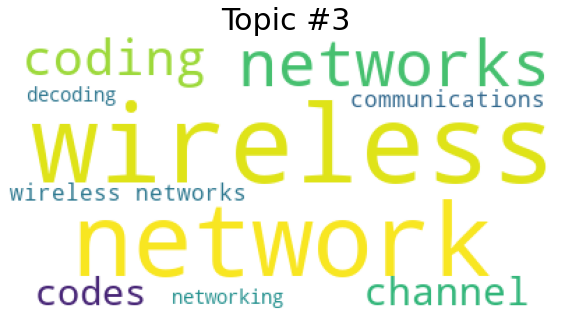

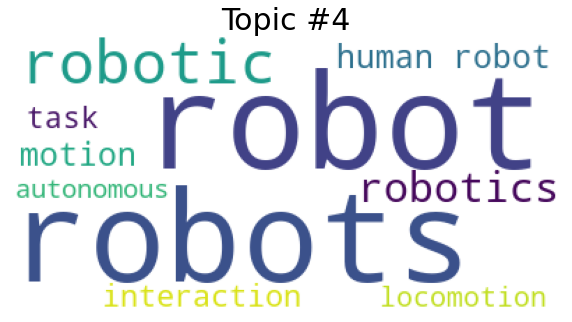

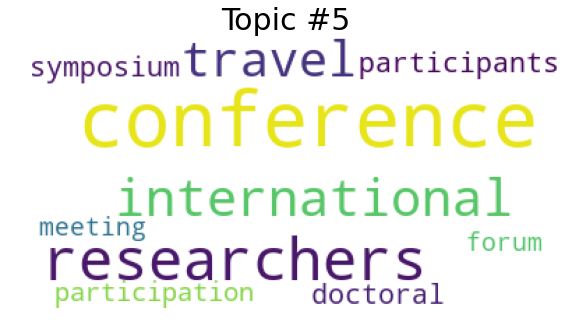

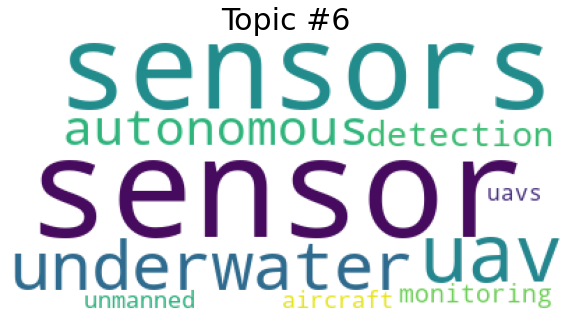

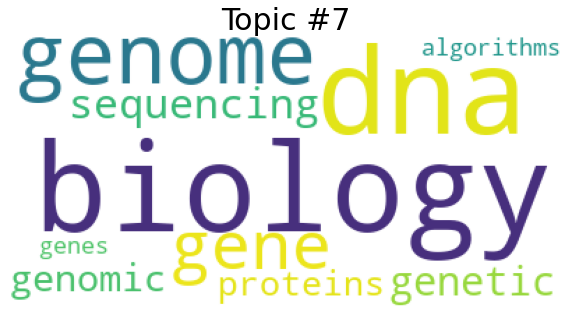

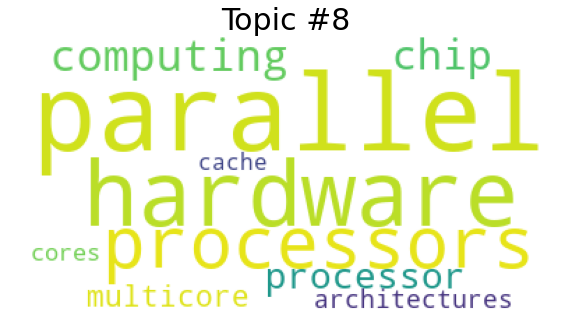

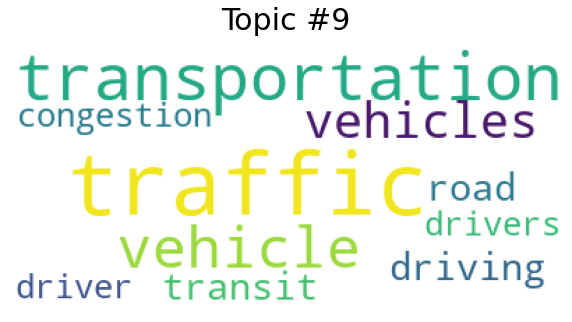

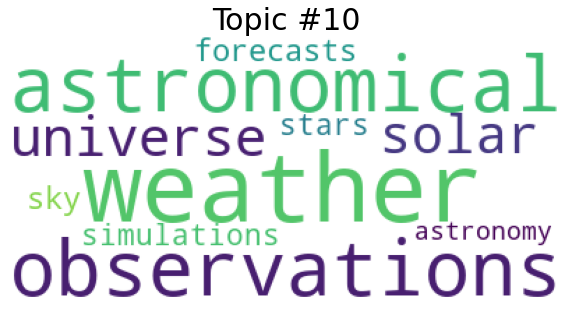

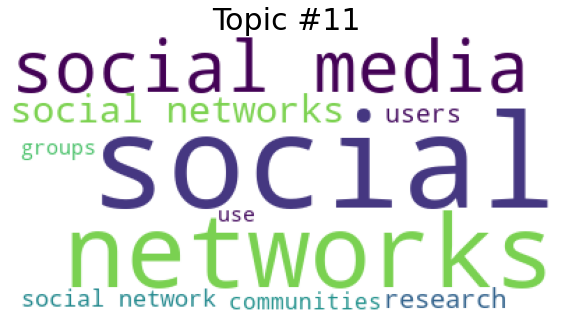

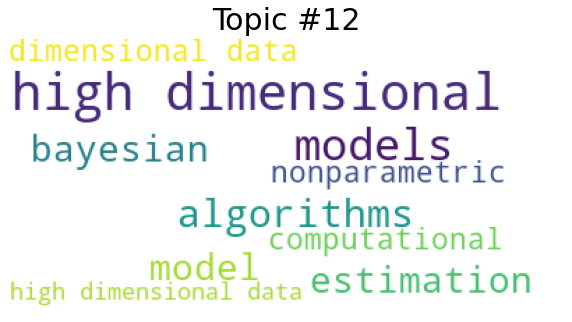

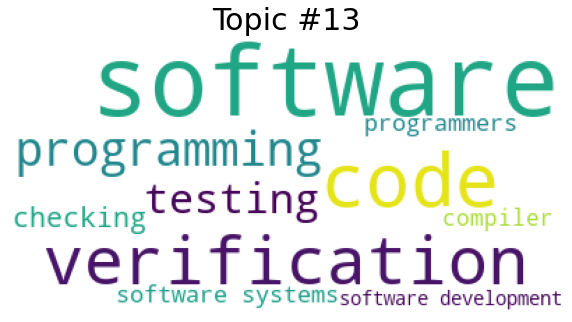

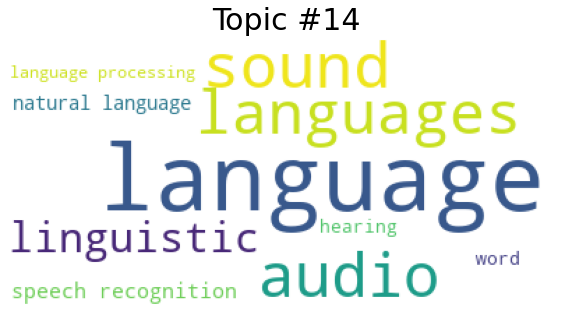

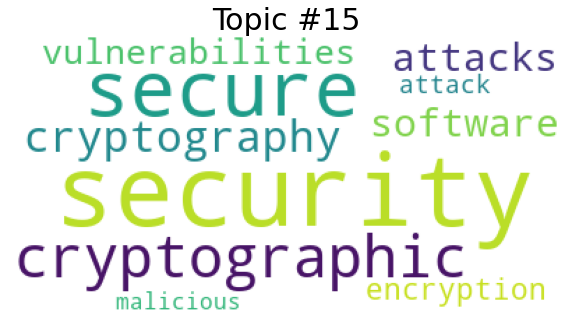

In [ ]:
for t in range(15):
    plt.figure(figsize = (10,10))
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1).fit_words(dict(topic_model.get_topic(t))))
    plt.axis("off")
    plt.title("Topic #" + str(t+1), fontsize=30)
    plt.show()